# Forest Management Problem - pymdptoolbox

In [1]:
import numpy as np
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox import mdp
import matplotlib.pyplot as plt
import json
import hiive.mdptoolbox.util as _util

## Value Iteration

In [2]:
def value_iteration(P, R, iterations, gamma=0.95):
    vi = mdp.ValueIteration(P, R, gamma, max_iter=iterations)
    return vi.run()

def perform_value_iteration_exp_problem_size():
    runs = {}
    for problem_size in [10, 100, 1000, 10000]:
        print("Iteration:", problem_size)
        
        prob, reward = forest(S=problem_size)
        run = value_iteration(prob, reward, 100)
        runs[problem_size] = run
    with open("ForestManagement-VI.json", "w+") as f:
        json.dump(runs, f, indent=4)


In [3]:
def value_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        print("Gamma:", gamma)
        prob, reward = forest(S=500)
        run = value_iteration(prob, reward, 100, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [4]:
perform_value_iteration_exp_problem_size()

Iteration: 10
Iteration: 100
Iteration: 1000
Iteration: 10000


In [5]:
value_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 1.0


In [6]:
policy, reward = forest(S=500)
vi = mdp.ValueIteration(policy, reward, max_iter=1000, gamma=0.95)
vi.run()
vi_policy = vi.policy
vi_value = vi.V

## Policy Iteration

In [7]:
def policy_iteration(P, R, iterations, gamma=0.95):
    pi = mdp.PolicyIteration(P, R, gamma, max_iter=iterations)
    return pi.run()

def perform_policy_iteration_exp_problem_size():
    runs = {}
    for problem_size in [10, 100, 1000, 10000]:
        print("Iteration:", problem_size)
        prob, reward = forest(S=problem_size)
        run = policy_iteration(prob, reward, 100)
        runs[problem_size] = run
    with open("ForestManagement-PI.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [8]:
def policy_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.999999]:
        print("Gamma:", gamma)
        prob, reward = forest(S=500)
        run = policy_iteration(prob, reward, 100, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma-PI.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [9]:
perform_policy_iteration_exp_problem_size()

Iteration: 10
Iteration: 100
Iteration: 1000
Iteration: 10000


In [10]:
policy_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 0.999999


In [11]:
policy, reward = forest(S=500)
pi = mdp.PolicyIteration(policy, reward, max_iter=100, gamma=0.95)
pi.run()
pi_policy = pi.policy
pi_value = pi.V

## Q-Learning

In [12]:
def convert(o):
    if isinstance(o, np.int64): return int(o)  
    else: return o
    
def q_learning(P, R, iterations, gamma=0.95, alpha_decay=0.99, epsilon_decay=0.99):
    ql = mdp.QLearning(P, R, gamma, n_iter=iterations, alpha_decay=alpha_decay, epsilon_decay=epsilon_decay)
    return ql.run()

def perform_q_learning_exp_problem_size():
    runs = {}
    for problem_size in [10, 100, 1000, 10000]:
        print("Iteration:", problem_size)
        prob, reward = forest(S=problem_size)
        run = q_learning(prob, reward, 1000000)
        runs[problem_size] = run
    with open("ForestManagement-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [13]:
def q_learning_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        print("Gamma:", gamma)
        prob, reward = forest(S=500)
        run = q_learning(prob, reward, 1000000, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [14]:
def q_learning_experiments_alpha_decay():
    runs = {}
    for ad in [0.99, 0.9, 0.8, 0.7, 0.6, 0.5]:
        print("Alpha:", ad)
        prob, reward = forest(S=500)
        run = q_learning(prob, reward, 1000000, alpha_decay=ad)
        runs[ad] = run
    with open("ForestManagement-alpha-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)
        
def q_learning_experiments_epsilon_decay():
    runs = {}
    for epd in [0.99, 0.95, 0.8, 0.75]:
        print("Epsilon_decay:", epd)
        prob, reward = forest(S=500)
        run = q_learning(prob, reward, 1000000, epsilon_decay=epd)
        runs[epd] = run
    with open("ForestManagement-epsilon-decay-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [15]:
perform_q_learning_exp_problem_size()

Iteration: 10
Iteration: 100
Iteration: 1000
Iteration: 10000


In [16]:
q_learning_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 1.0


In [17]:
q_learning_experiments_alpha_decay()
q_learning_experiments_epsilon_decay()

Alpha: 0.99
Alpha: 0.9
Alpha: 0.8
Alpha: 0.7
Alpha: 0.6
Alpha: 0.5
Epsilon_decay: 0.99
Epsilon_decay: 0.95
Epsilon_decay: 0.8
Epsilon_decay: 0.75


In [18]:
policy, reward = forest(S=500)
ql = mdp.QLearning(policy, reward, n_iter=1000000, gamma=0.95)
ql.run()
ql_policy = ql.policy
ql_value = ql.V

## Visualization

#### Value Iteration - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


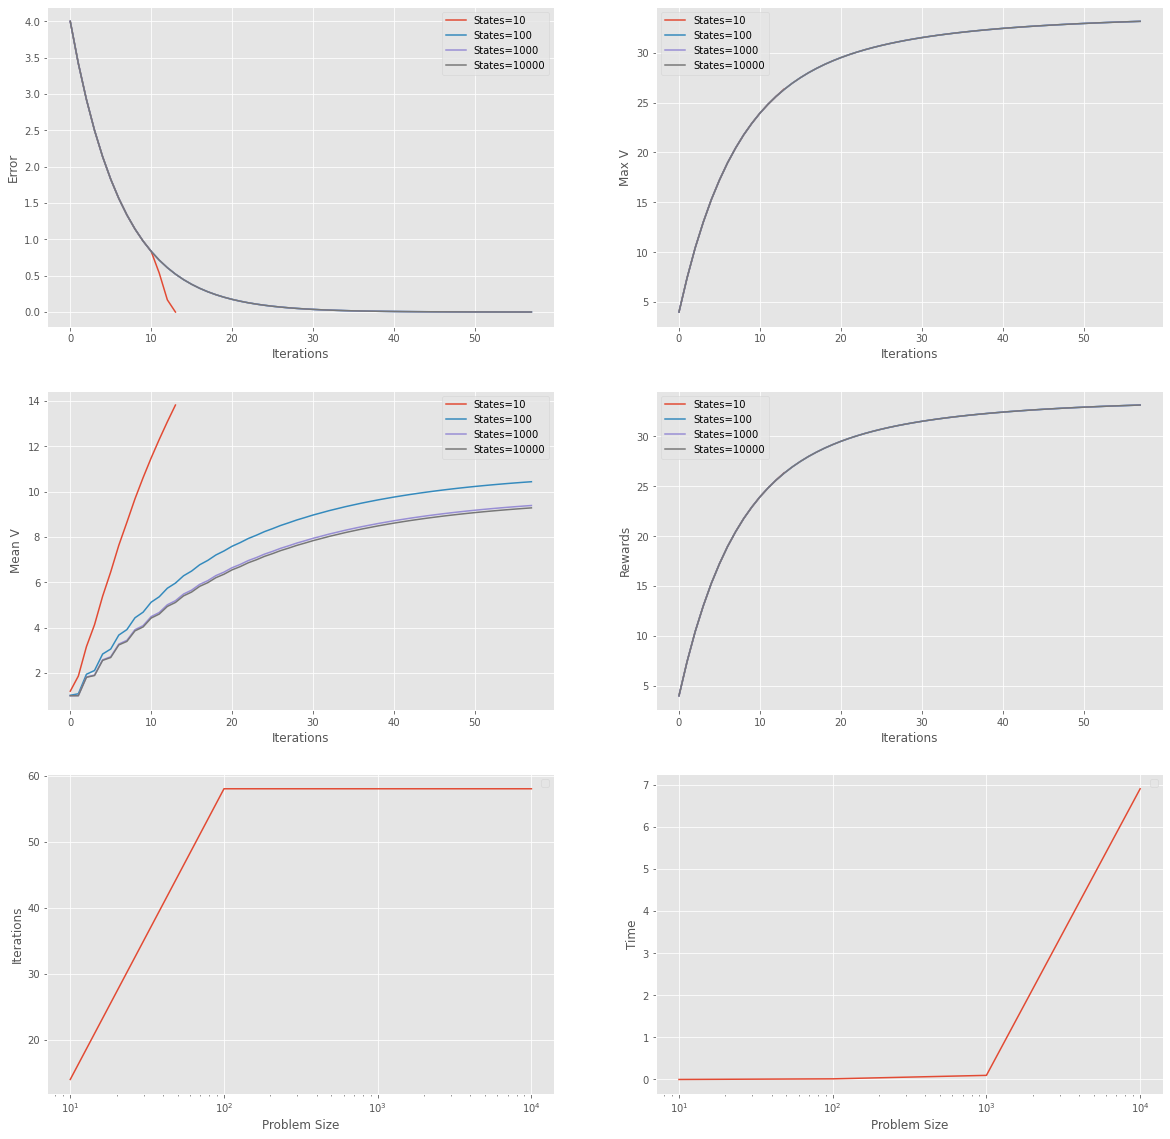

In [19]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
numbering = ['a', 'b', 'c', 'd', 'e', 'f']
with open("ForestManagement-VI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [10,100,1000,10000]:
        problem_size = str(problem_size)
        
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
        
    ax[2][0].plot([10,100, 1000, 10000], iterations)
    ax[2][1].plot([10,100, 1000, 10000], time)
    
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')
    ax[2][0].set_xscale('log')
    ax[2][1].set_xscale('log')

    
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Policy Iteration - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


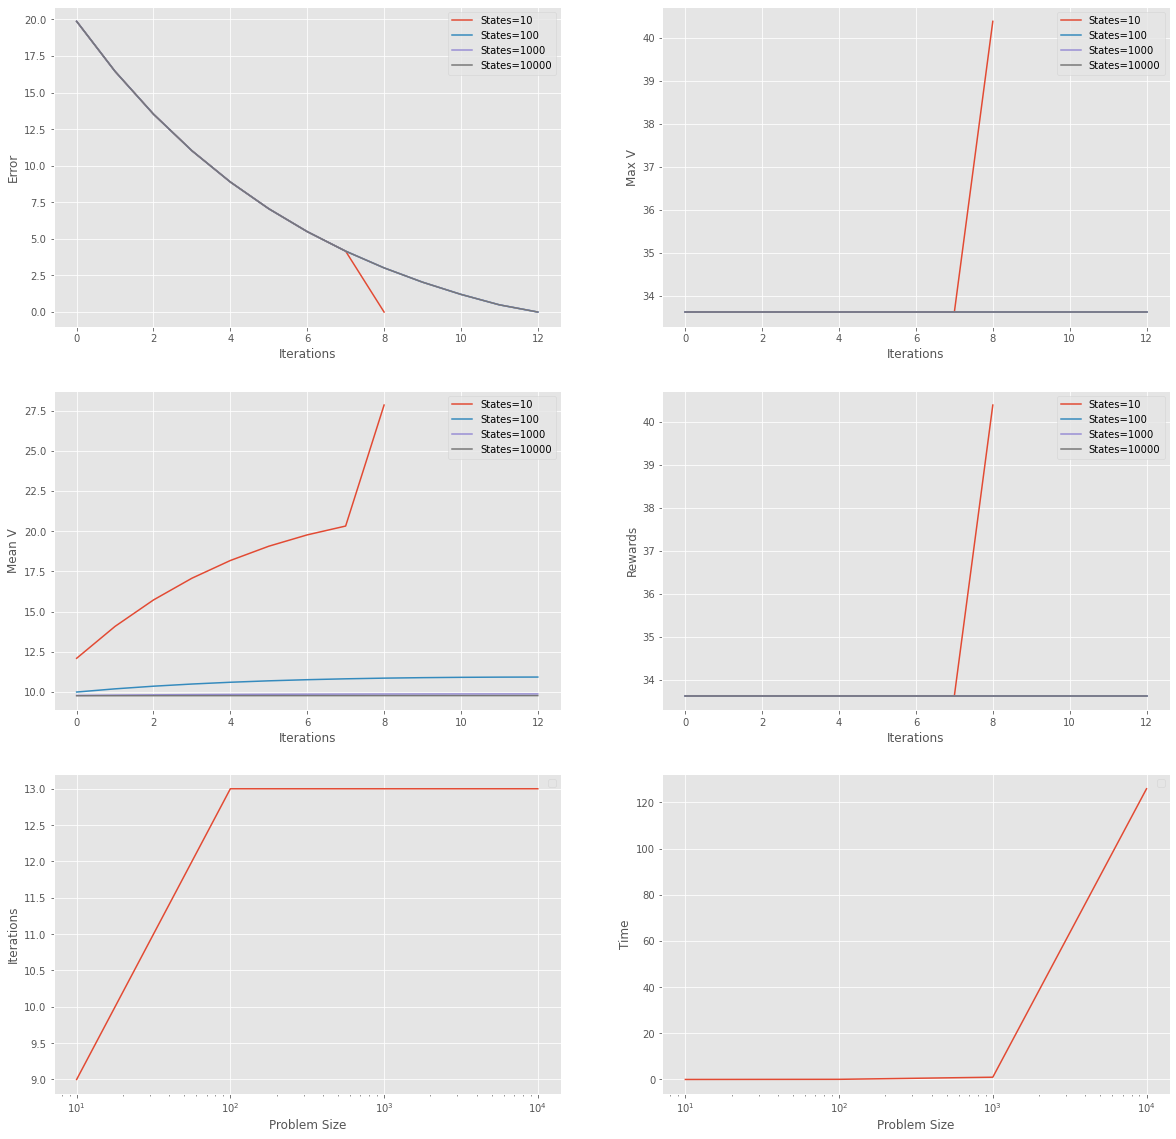

In [21]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
with open("ForestManagement-PI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [10,100, 1000, 10000]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
    ax[2][0].plot([10,100, 1000, 10000], iterations)
    ax[2][1].plot([10,100, 1000, 10000], time)
     
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')
    ax[2][1].set_xscale('log')
    ax[2][0].set_xscale('log')
    
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Q-Learning - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


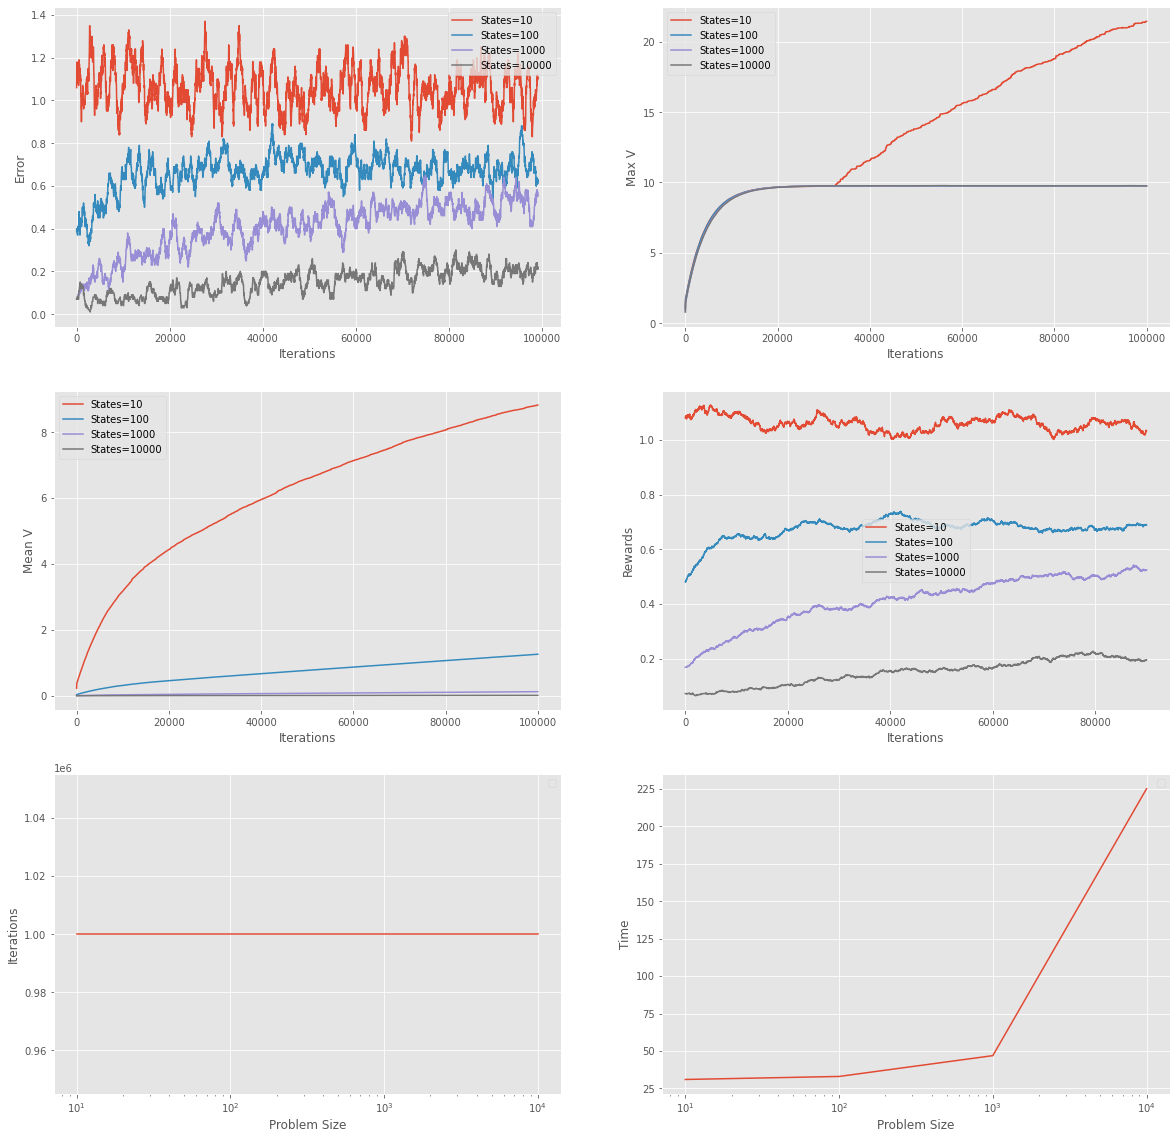

In [24]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
with open("ForestManagement-QL.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [10,100,1000,10000]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(range(0, 99010, 10), np.convolve(rewards[problem_size], np.ones((100,))/100, mode='valid'), label=label)
        ax[0][1].plot(range(0, 100000, 10), maxvs[problem_size], label=label)
        ax[1][0].plot(range(0, 100000, 10), meanvs[problem_size], label=label)
        ax[1][1].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
    ax[2][0].plot([10,100, 1000, 10000], iterations)
    ax[2][1].plot([10,100, 1000, 10000], time)
    
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')    
    ax[2][0].set_xscale('log')
    ax[2][1].set_xscale('log')
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

## Gamma
### Value Iteration

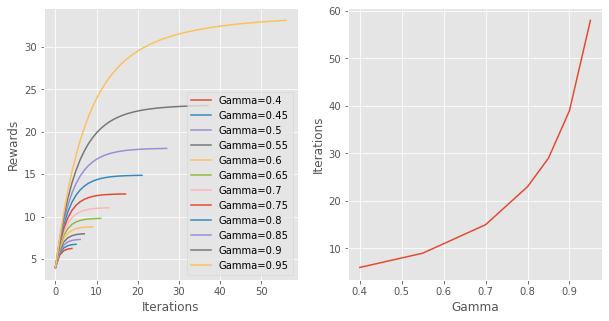

In [25]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size][:-1], label=label)
    ax[1].plot(gammas, iterations[:-1])
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### Policy Iteration

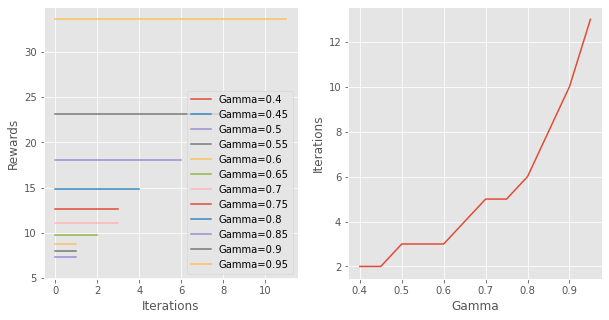

In [27]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma-PI.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size][:-1], label=label)
    ax[1].plot(gammas, iterations[:-1])
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### QLearning

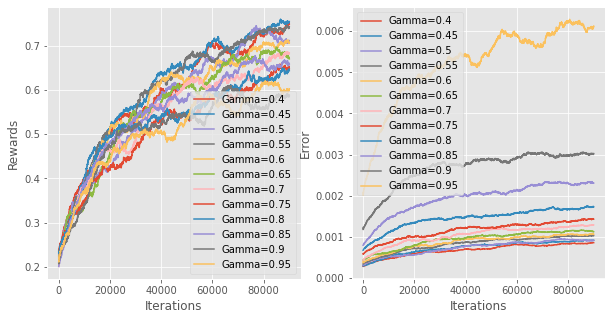

In [30]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for gamma, values in vl_val.items():
        if gamma == '1.0':
            break
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[gamma] = reward
        errors[gamma] = error
        
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 90010, 10), np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

## Q-Learning - Alpha

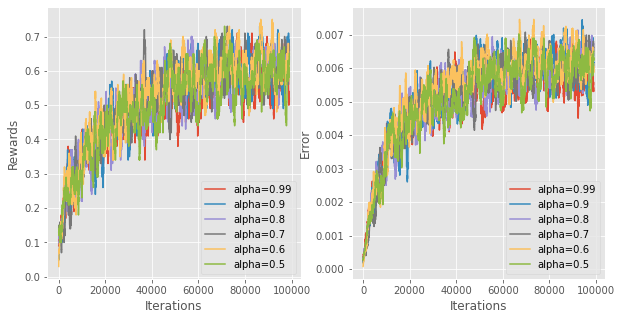

In [31]:
plt.style.use('ggplot')

alphas = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-alpha-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for alpha, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[alpha] = reward
        errors[alpha] = error
        
    for problem_size in alphas:
        problem_size = str(problem_size)
        label = f"alpha={round(eval(problem_size), 2)}"
        ax[0].plot(range(0, 99010, 10), np.convolve(rewards[problem_size], np.ones((100,))/100, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 99010, 10), np.convolve(errors[problem_size], np.ones((100,))/100, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

### QLearning -  Epsilon Decay

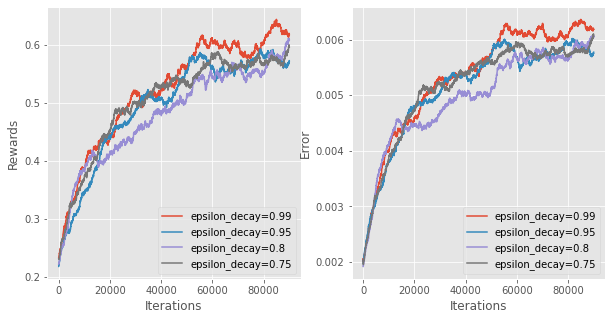

In [32]:
plt.style.use('ggplot')

epds = [0.99, 0.95, 0.8, 0.75]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-epsilon-decay-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for epd, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[epd] = reward
        errors[epd] = error
        
    for problem_size in epds:
        problem_size = str(problem_size)
        label = f"epsilon_decay={round(eval(problem_size), 2)}"
        ax[0].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 90010, 10), np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

Text(0.5, 1.0, 'Q Learning')

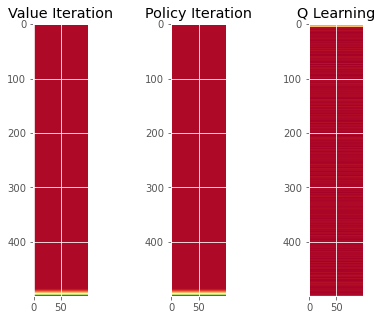

In [34]:
width = 100
fix, ax = plt.subplots(ncols=3, figsize=(7, 5))
ax[0].imshow(np.repeat(vi_value, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[0].set_title("Value Iteration")
ax[1].imshow(np.repeat(pi_value, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[1].set_title("Policy Iteration")
ax[2].imshow(np.repeat(ql_value, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[2].set_title("Q Learning")

Text(0.5, 1.0, 'Q Learning')

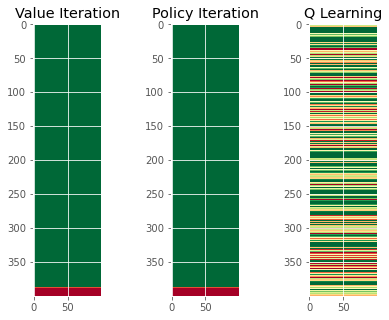

In [37]:
width = 100
fix, ax = plt.subplots(ncols=3, figsize=(7, 5))
ax[0].imshow(np.repeat(vi_policy, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[0].set_title("Value Iteration")
ax[1].imshow(np.repeat(pi_policy, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[1].set_title("Policy Iteration")
ax[2].imshow(np.repeat(ql_policy, width).reshape(-1, width)[100:], cmap='RdYlGn')
ax[2].set_title("Q Learning")

## Interesting Results

### Value vs Policy Iteration

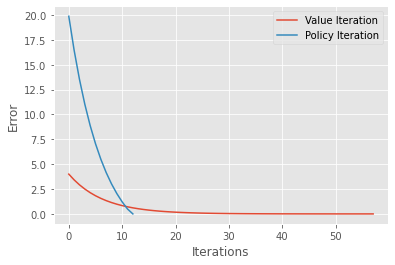

In [38]:
vi_values = []
with open("ForestManagement-VI.json") as f:
    vi_values = json.load(f)
pi_values = []
with open("ForestManagement-PI.json") as f:
    pi_values = json.load(f)

def get_list(data, key):
    return [datum[key] for datum in data]

plt.figure()
plt.plot(get_list(vi_values['1000'], 'Error'), label="Value Iteration")
plt.plot(get_list(pi_values['1000'], 'Error'), label="Policy Iteration")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend(loc="best")

Text(0, 0.5, 'Iterations')

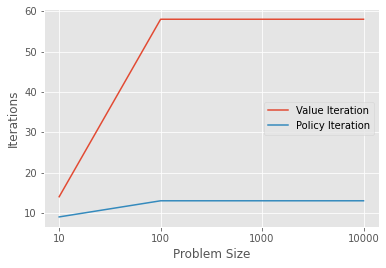

In [39]:
plt.figure()
vi_iters = []
pi_iters = []
for problem_size in vi_values.keys():
    vi_iters.append(vi_values[problem_size][-1]['Iteration'])
    pi_iters.append(pi_values[problem_size][-1]['Iteration'])

plt.plot(vi_values.keys(), vi_iters, label="Value Iteration")
plt.plot(pi_values.keys(), pi_iters, label="Policy Iteration")
plt.legend(loc="best")
plt.xlabel("Problem Size")
plt.ylabel("Iterations")

Text(0, 0.5, 'Time')

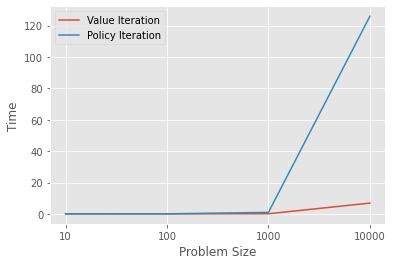

In [40]:
plt.figure()
vi_time = []
pi_time = []
for problem_size in vi_values.keys():
    vi_time.append(vi_values[problem_size][-1]['Time'])
    pi_time.append(pi_values[problem_size][-1]['Time'])

plt.plot(vi_values.keys(), vi_time, label="Value Iteration")
plt.plot(pi_values.keys(), pi_time, label="Policy Iteration")

plt.legend(loc="best")
plt.xlabel("Problem Size")
plt.ylabel("Time")

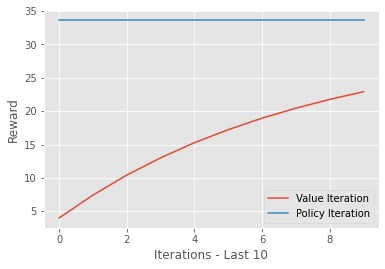

In [41]:
vi_values = []
with open("ForestManagement-VI.json") as f:
    vi_values = json.load(f)
pi_values = []
with open("ForestManagement-PI.json") as f:
    pi_values = json.load(f)

def get_list(data, key):
    return [datum[key] for datum in data]

plt.figure()
plt.plot(get_list(vi_values['1000'][:10], 'Reward'), label="Value Iteration")
plt.plot(get_list(pi_values['1000'][:10], 'Reward'), label="Policy Iteration")
plt.xlabel("Iterations - Last 10")
plt.ylabel("Reward")
plt.legend(loc="best")

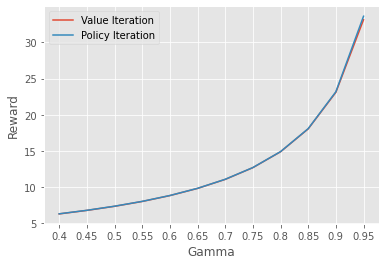

In [42]:
vi_values_gamma = []
with open("ForestManagement-gamma.json") as f:
    vi_values_gamma = json.load(f)
pi_values_gamma = []
with open("ForestManagement-gamma-PI.json") as f:
    pi_values_gamma = json.load(f)
    
gr_vi = []
gr_pi = []
gammas = list(vi_values_gamma.keys())[:-1]
for gamma in gammas:
    gr_vi.append(vi_values_gamma[gamma][-1]['Reward'])
    gr_pi.append(pi_values_gamma[gamma][-1]['Reward'])
    
plt.figure()
plt.plot(gammas, gr_vi, label="Value Iteration")
plt.plot(gammas, gr_pi, label="Policy Iteration")
plt.xlabel("Gamma")
plt.ylabel("Reward")
plt.legend(loc="best")

### QLearning

alpha_decay vs sum of errors

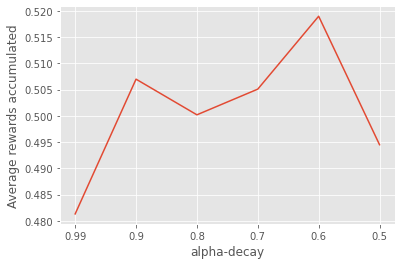

In [58]:
ql_values_ad = []
with open("ForestManagement-alpha-QL.json") as f:
    ql_values_ad = json.load(f)

ql_sum_of_errors = []
for ad in ql_values_ad.keys():
    ql_sum_of_errors.append(np.average(np.abs(get_list(ql_values_ad[ad],  'Reward'))))

plt.xlabel("alpha-decay")
plt.ylabel("Average rewards accumulated")
plt.plot(ql_values_ad.keys(), ql_sum_of_errors)

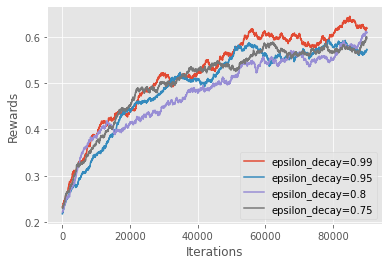

In [47]:
plt.style.use('ggplot')

epds = [0.99, 0.95, 0.8, 0.75]
plt.figure()
with open("ForestManagement-epsilon-decay-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for epd, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[epd] = reward
        errors[epd] = error
        
    for problem_size in epds:
        problem_size = str(problem_size)
        label = f"epsilon_decay={round(eval(problem_size), 2)}"
        plt.plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
    plt.xlabel('Iterations')
    plt.ylabel('Rewards')
    plt.legend(loc="best")

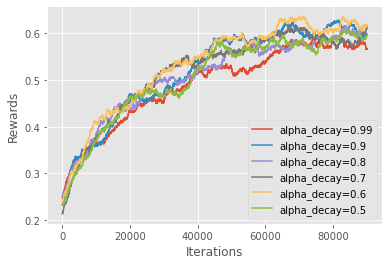

In [62]:
plt.style.use('ggplot')

plt.figure()
rewards = {}
error = {}
for ad, values in ql_values_ad.items():

    reward = []
    error = []
    for value in values:
        reward.append(value['Reward'])
        error.append(value['Error'])
    rewards[ad] = reward
    errors[ad] = error
for problem_size in ql_values_ad.keys():
    problem_size = str(problem_size)
    label = f"alpha_decay={round(eval(problem_size), 2)}"
    plt.plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend(loc="best")